In [1]:
#import the packages..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# converting the CSV files to data frames:
employee= pd.read_csv("F:/A_number_of_data_science_books/Assignment_capstone_projects/Capstone/employee_survey_data.csv")
general= pd.read_csv("F:/A_number_of_data_science_books/Assignment_capstone_projects/Capstone/general_data.csv")
manager= pd.read_csv("F:/A_number_of_data_science_books/Assignment_capstone_projects/Capstone/manager_survey_data.csv")

intime= pd.read_csv("F:/A_number_of_data_science_books/Assignment_capstone_projects/Capstone/in_time.csv" )
outtime= pd.read_csv("F:/A_number_of_data_science_books/Assignment_capstone_projects/Capstone/out_time.csv")

# 2. Exploratory Data Analysis

# Basic exploratory data analysis

In [3]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [4]:
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [5]:
employee.head(4)


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0


In [6]:
general.name="General dataset"
employee.name="Employee dataset"
manager.name = "Manager dataset"

intime.name = "login dataset"
outtime.name ="logout dataset"

In [7]:
data = [general,employee,manager]
log_time=[intime,outtime]


for dataset in data:
    print(dataset.name + ":")
    print(dataset.info())
    print("-"*20)
    

General dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel    

Let's see if somehow we can combine all the datasets. The 'EmployeeID' seems to be a key, as it appears in every dataset.

In [8]:
 #let's see if all the values are unique:

for dataset in data:
    print(dataset.name +':')  
    print(len(set(dataset['EmployeeID'])))  # for each dataset 'EmployeeID' column contains 4410 unique values
    print('-'*20)

General dataset:
4410
--------------------
Employee dataset:
4410
--------------------
Manager dataset:
4410
--------------------


In [9]:
# let's see if the intime and outtime datasets have also EmployeeID column:
intime.head(4)





,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15


In [10]:
outtime.head(4)
# we see in the output that both datasets have the same column names (1 unnamed + dates).


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14


In [11]:
for dataset in log_time:
    print(dataset.name + ":" )
    print(len(dataset["Unnamed: 0"]))  
    print('-'*20)
    
# for each dataset 'EmployeeID' column contains 4410 unique values. It seems it's our desired key column
    

login dataset:
4410
--------------------
logout dataset:
4410
--------------------


In [12]:
intime.rename(columns={'Unnamed: 0':'EmployeeID'} , inplace = True)

In [13]:
intime.columns

Index(['EmployeeID', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

In [14]:
outtime.rename(columns={'Unnamed: 0':'EmployeeID'} , inplace = True)

In [15]:
outtime.columns


Index(['EmployeeID', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
       '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
       ...
       '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24',
       '2015-12-25', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', length=262)

In [16]:
# let's make sure that in every set we have the same 'EmployeeID' values:

print(len(set(general['EmployeeID']).intersection(manager['EmployeeID'])
          .intersection(intime['EmployeeID']).intersection(employee['EmployeeID']).intersection(outtime['EmployeeID'])))

4410


In [17]:
for dataset in log_time:
    dataset.set_index('EmployeeID', inplace=True)

# Setting the EmployeeID as the index column in intime and outtime datsetss.

In [18]:
for dataset in data:
    dataset.set_index('EmployeeID', inplace=True)

#Setting the EmployeeID as the index column general, manager and employee datasets..


Now we are almost ready to merge all the datasets, but firstly let's explore the login/logout datasets and pull out usefull information from there.

In [19]:
# transposing dataframes to perform calculations:
emp_out_time_transposed = outtime.T
emp_in_time_transposed = intime.T

In [20]:
# changing format of indexes and variables
emp_out_time_transposed.index = pd.to_datetime(emp_out_time_transposed.index)
emp_in_time_transposed.index = pd.to_datetime(emp_in_time_transposed.index)

emp_out_time_transposed = emp_out_time_transposed.apply(pd.to_datetime, errors='raise')
emp_in_time_transposed = emp_in_time_transposed.apply(pd.to_datetime, errors='raise')

In [21]:
work_time =  emp_out_time_transposed.sub(emp_in_time_transposed)  # subract in time from out time to get no. of hours worked..
work_time.head()

EmployeeID,1,2,3,4,5,6,7,8,9,10,...,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410
2015-01-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2015-01-02,07:12:30,08:06:33,06:41:33,07:20:18,08:03:20,10:46:46,06:50:18,07:05:25,NaT,07:21:38,...,07:30:51,07:45:23,06:59:03,07:30:01,06:50:28,08:07:05,06:15:20,07:16:34,09:31:32,06:50:10
2015-01-05,07:11:23,07:27:17,07:15:56,07:17:31,07:59:17,10:43:19,07:32:18,07:03:13,06:59:01,07:06:05,...,07:38:07,07:59:28,07:14:07,07:17:41,07:36:10,08:50:27,NaT,07:35:07,09:35:13,07:16:48
2015-01-06,07:24:39,NaT,06:24:19,06:56:35,07:40:57,10:57:49,07:16:00,06:39:09,07:19:05,07:30:54,...,07:34:50,08:08:26,07:28:30,07:10:05,07:26:24,08:23:58,05:23:37,07:38:29,09:47:18,06:43:40
2015-01-07,07:00:24,07:23:49,06:45:54,06:55:10,07:48:22,10:17:55,06:25:19,06:49:34,07:33:26,07:09:11,...,07:06:55,08:19:05,06:37:51,07:04:34,07:00:49,08:50:42,05:43:40,07:59:10,09:23:28,06:50:32


In [22]:
avg_work_time = work_time.mean()   # this variable will help us to create a new feature ('Overtime') a bit later
avg_work_time.head()

EmployeeID
1   07:22:25.142241
2   07:43:08.288135
3   07:00:47.665289
4   07:11:37.242553
5   08:00:22.228571
dtype: timedelta64[ns]

#  Concatenating datasets 

In [23]:
main_df = pd.concat(data,1)

# Exploratory Data Analysis of combined datase

In [24]:
main_df.head(4)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3


In [25]:
main_df['Overtime'] = (avg_work_time.astype('timedelta64[s]') / 3600)- main_df['StandardHours']
# adding average overtime in hours variable (float)

In [26]:
main_df.head(4)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Overtime
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,6,1,0,0,3.0,4.0,2.0,3,3,-0.626389
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,3,5,1,4,3.0,2.0,4.0,2,4,-0.281111
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,2,5,0,3,2.0,2.0,1.0,3,3,-0.986944
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,5,8,7,5,4.0,4.0,3.0,2,3,-0.806389


In [27]:
main_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Overtime
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,...,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,-0.299347
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,...,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742,1.340217
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,-2.049722
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,...,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,-1.326875
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-0.593333
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,...,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.368542
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.030833


## Dealing with missing value

In [28]:
# checking for missing values..
main_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
Overtime                    0
dtype: int64

There are five columns with missing values, the number of missing values is relatively low. I am going to drop them.

In [29]:
#Dropping the rows having missing values..
main_df.dropna(inplace = True)

In [30]:
main_df.shape

# Rows reduce from 4410 to 4300...


(4300, 29)

In [31]:
# some stats..
main_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Overtime
count,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,1.0,2.066977,65059.844186,2.690000,15.210698,8.0,0.795349,...,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953,-0.297261
std,9.146517,8.097059,1.024774,0.0,1.106633,47045.398914,2.495764,3.662777,0.0,0.853534,...,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946,1.342715
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,-2.049722
25%,30.000000,2.000000,2.000000,1.0,1.000000,29260.000000,1.000000,12.000000,8.0,0.000000,...,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,-1.333333
50%,36.000000,7.000000,3.000000,1.0,2.000000,49360.000000,2.000000,14.000000,8.0,1.000000,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-0.592639
75%,43.000000,14.000000,4.000000,1.0,3.000000,83802.500000,4.000000,18.000000,8.0,1.000000,...,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.380694
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.030833


## Our goal is to predict employees' churn, that's why the 'Attrition' is our dependent variable. Around 16% of the employees has already left the company

No     0.84
Yes    0.16
Name: Attrition, dtype: float64


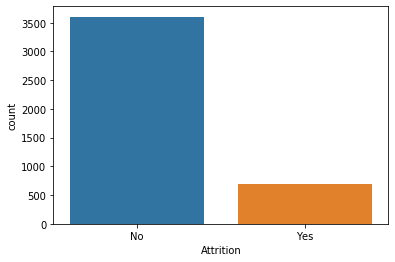

In [32]:
print(round(main_df['Attrition'].value_counts(normalize = True),2))
sns.countplot(x='Attrition',data=main_df)

In [33]:
#print all the data type and there unique columns..
for column in main_df.columns:
    if main_df[column].dtype == object:
        print(str(column) + " : "+ str(main_df[column].unique()))
        print(main_df[column].value_counts())
        print("___________________________________________________________")

Attrition : ['No' 'Yes']
No     3605
Yes     695
Name: Attrition, dtype: int64
___________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        3051
Travel_Frequently     809
Non-Travel            440
Name: BusinessTravel, dtype: int64
___________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    2807
Sales                     1307
Human Resources            186
Name: Department, dtype: int64
___________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1766
Medical             1364
Marketing            469
Technical Degree     384
Other                237
Human Resources       80
Name: EducationField, dtype: int64
___________________________________________________________
Gender : ['Female' 'Ma

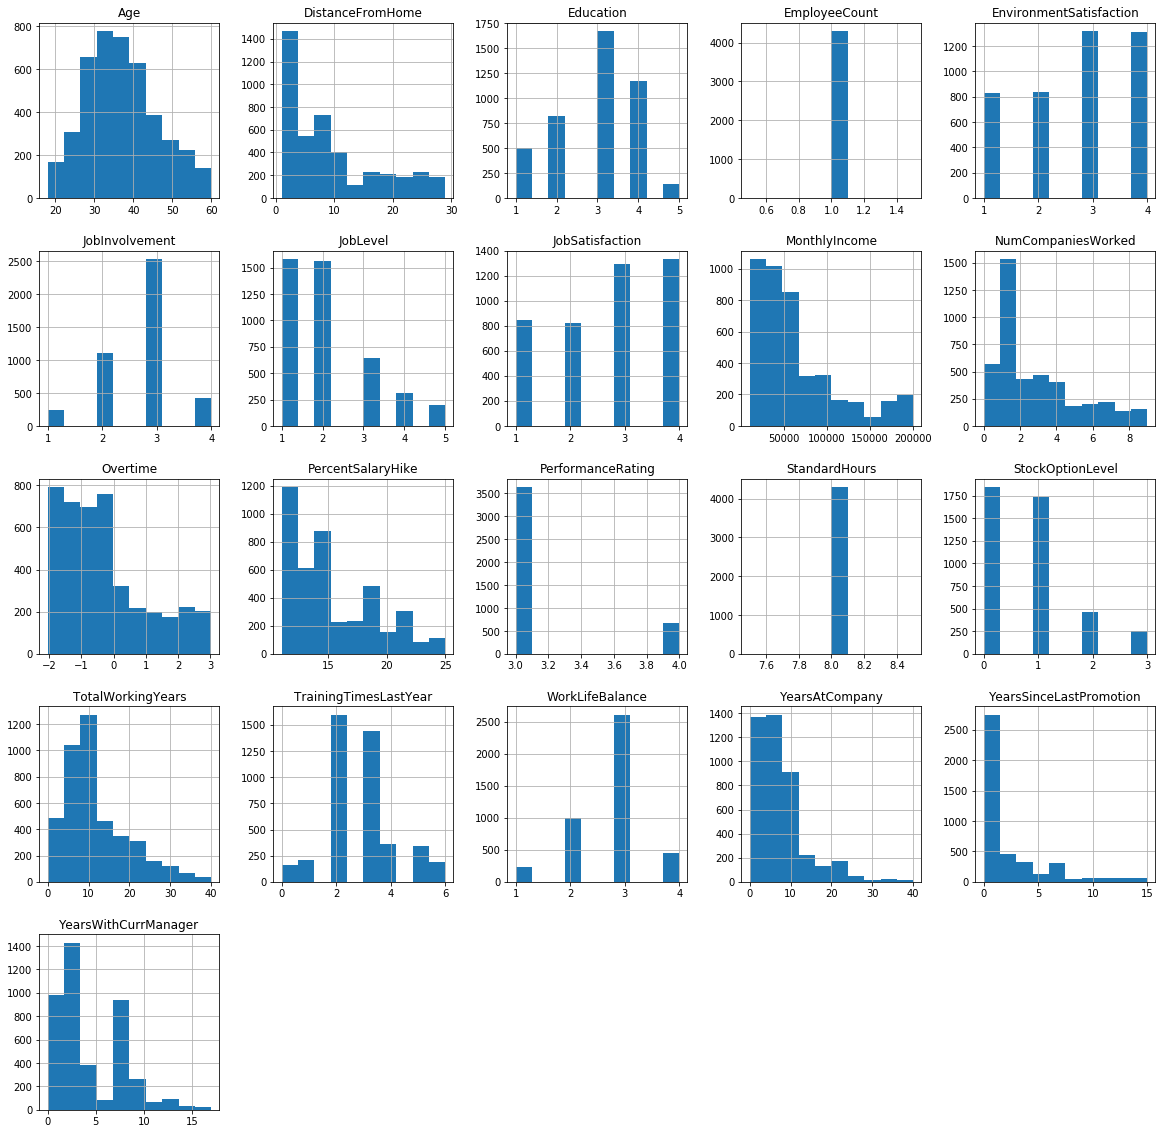

In [34]:
main_df.hist(figsize=(20,20))
plt.show()


In [35]:
# dropping unnecessary variables:

main_df.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis = 1, inplace = True)

# Data Visualization 

In [36]:
# Correlation b/w all the columns

corr_cols = main_df[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

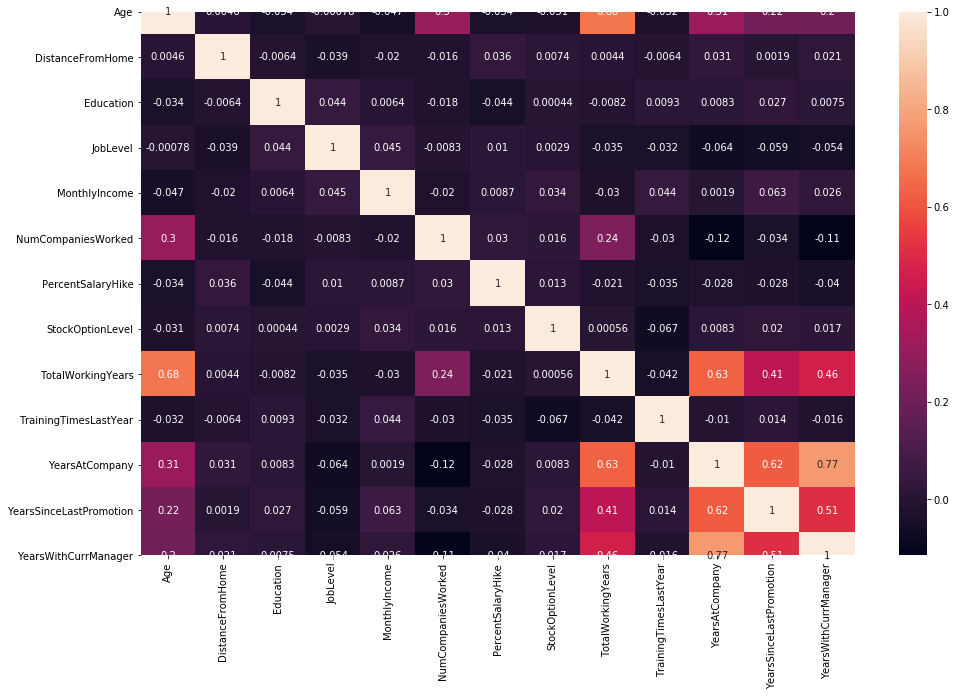

In [37]:
corr = corr_cols.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()

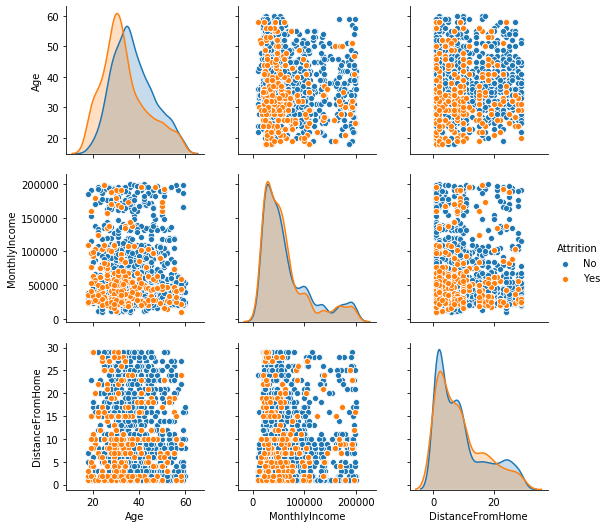

In [38]:
sns.pairplot(main_df[['Age','MonthlyIncome','DistanceFromHome','Attrition']],hue = 'Attrition')

In [39]:
main_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Overtime'],
      dtype='object')

In [40]:
print('Frequency of travels (in %): \n')
print(round(main_df['BusinessTravel'].value_counts(normalize = True)*100,2))
print('\nAttrition rate by Frequency of travels \n')
print(round(main_df['BusinessTravel'][main_df['Attrition'] == 'Yes']
            .value_counts()/main_df['BusinessTravel'].value_counts()*100,2))

Frequency of travels (in %): 

Travel_Rarely        70.95
Travel_Frequently    18.81
Non-Travel           10.23
Name: BusinessTravel, dtype: float64

Attrition rate by Frequency of travels 

Travel_Rarely        15.08
Travel_Frequently    24.60
Non-Travel            8.18
Name: BusinessTravel, dtype: float64


Employee that travels frequently are leaving the company more as compare to non travel or less frequently traveler.

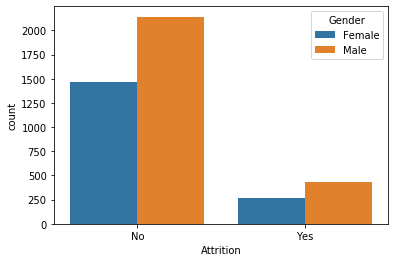

In [41]:
## gender ###
sns.countplot(x = "Attrition",data=main_df,hue="Gender")
plt.show()

male employees are the most to leave the company

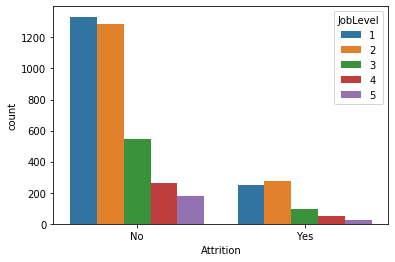

In [42]:
### Job level ###
sns.countplot(x = "Attrition",data=main_df,hue="JobLevel")
plt.show()

job level 1 and 2 are the most to leave the company..

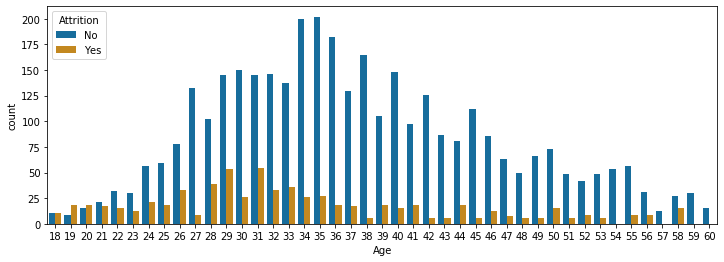

In [43]:
###  AGE ###

#show the number of employees that stayed or left the company by age
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Age" , hue="Attrition" , data =main_df, palette="colorblind"  )




Age of 29 and 31 are the ages that are leaving the company.

In [44]:
###  Department ###
print('Number of Employees in department (in %): \n')
print(round(main_df['Department'].value_counts(normalize = True)*100,2))  
print('\nAttrition rate by Department \n')
print(round(main_df['Department'][main_df['Attrition'] == 'Yes'].value_counts()/main_df['Department'].value_counts()*100,2))

Number of Employees in department (in %): 

Research & Development    65.28
Sales                     30.40
Human Resources            4.33
Name: Department, dtype: float64

Attrition rate by Department 

Research & Development    15.78
Sales                     15.15
Human Resources           29.03
Name: Department, dtype: float64


 Human Resources >  Research & develpoment  >  sales

In [45]:
###  Eduction  ###
print('Number of Employees by Education Level (in %): \n')
print(round(main_df['Education'].value_counts(normalize = True)*100,2).sort_index())
print('\nAttrition rate by Education Level: \n')
print(round(main_df['Education'][main_df['Attrition'] == 'Yes'].
            value_counts()/main_df['Education'].value_counts()*100,2).sort_index())

Number of Employees by Education Level (in %): 

1    11.60
2    19.14
3    38.84
4    27.16
5     3.26
Name: Education, dtype: float64

Attrition rate by Education Level: 

1    15.43
2    18.83
3    15.51
4    15.75
5    14.29
Name: Education, dtype: float64


In [46]:
### Eduction Field  ###
print('Number of Employees by Education Field (in %): \n')
print(round(main_df['EducationField'].value_counts(normalize = True)*100,2).sort_index())

print('\nAttrition rate by Education Field: \n')
print(round(main_df['EducationField'][main_df['Attrition'] == 'Yes'].
            value_counts()/main_df['EducationField'].value_counts()*100,2).sort_index())


Number of Employees by Education Field (in %): 

Human Resources      1.86
Life Sciences       41.07
Marketing           10.91
Medical             31.72
Other                5.51
Technical Degree     8.93
Name: EducationField, dtype: float64

Attrition rate by Education Field: 

Human Resources     40.00
Life Sciences       16.70
Marketing           15.78
Medical             16.06
Other               12.66
Technical Degree    11.72
Name: EducationField, dtype: float64



Attrition rate by Marital Status: 

Divorced     9.91
Married     12.75
Single      25.33
Name: MaritalStatus, dtype: float64


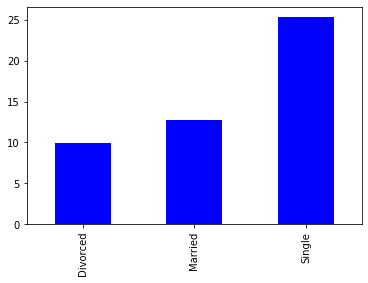

In [47]:
### Martial Status ###
print('\nAttrition rate by Marital Status: \n')
print(round(main_df['MaritalStatus'][main_df['Attrition'] == 'Yes'].
            value_counts()/main_df['MaritalStatus'].value_counts()*100,2))
(main_df['MaritalStatus'][main_df['Attrition'] == 'Yes'].
 value_counts()/main_df['MaritalStatus'].value_counts()*100).plot.bar(color = 'blue')

In [48]:
#### Work life balance.. ###
print('Number of Employees by Work Life Balance Level(in %): \n')
print(round(main_df['WorkLifeBalance'].value_counts(normalize = True)*100,2).sort_index())

print('\nAttrition rate by Work Life Balance Level: \n')
print(round(main_df['WorkLifeBalance'][main_df['Attrition'] == 'Yes'].
            value_counts()/main_df['WorkLifeBalance'].value_counts()*100,2).sort_index())

Number of Employees by Work Life Balance Level(in %): 

1.0     5.49
2.0    23.37
3.0    60.67
4.0    10.47
Name: WorkLifeBalance, dtype: float64

Attrition rate by Work Life Balance Level: 

1.0    30.93
2.0    16.62
3.0    14.37
4.0    17.78
Name: WorkLifeBalance, dtype: float64


Majority of employee whose work life balance is poor are leaving the company..

# Converting the categorical variable into numerical variable 

In [49]:
#encoding the variables...

main_df['Overtime'] = np.where(main_df['Overtime']>0, 1, 0)

In [50]:
df = main_df.copy()

In [51]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Overtime
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,3.0,4.0,2.0,3,3,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,3.0,2.0,4.0,2,4,0
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,2,5,0,3,2.0,2.0,1.0,3,3,0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,5,8,7,5,4.0,4.0,3.0,2,3,0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,2,6,0,4,4.0,1.0,3.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,2,6,1,5,3.0,4.0,3.0,2,3,0
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,5,3,0,2,4.0,1.0,3.0,3,3,1
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,2,3,0,2,4.0,4.0,3.0,2,3,0


In [52]:
# Transform the data.
#Transform the non numerical column into numerical columns..
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])
        

In [53]:
# creating a new column Age_years
df["Age_years"] = df["Age"]


In [54]:
#droping the age columns
df.drop("Age" , axis = 1 ,inplace = True)
df

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Overtime,Age_years
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0,2,2,5,1,1,0,0,0,1,...,1,0,0,3.0,4.0,2.0,2,0,0,33
2,1,1,1,9,0,1,0,0,6,2,...,5,1,4,3.0,2.0,4.0,1,1,0,13
3,0,1,1,16,3,4,1,3,7,1,...,5,0,3,2.0,2.0,1.0,2,0,0,14
4,0,0,1,1,4,1,1,2,1,1,...,8,7,5,4.0,4.0,3.0,1,0,0,20
5,0,2,1,9,0,3,1,0,7,2,...,6,0,4,4.0,1.0,3.0,2,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0,2,2,3,2,4,0,1,1,2,...,6,1,5,3.0,4.0,3.0,1,0,0,11
4406,0,2,1,4,3,3,0,0,6,2,...,3,0,2,4.0,1.0,3.0,2,0,1,24
4407,0,2,1,1,3,3,1,0,2,0,...,3,0,2,4.0,4.0,3.0,1,0,0,11


In [55]:
#split the data..
X = df.iloc[:,1:].values   # Dependent variables..
Y = df.iloc[:,0].values  # Target variable....

In [56]:
X.shape

(4300, 25)

In [57]:
Y.shape

(4300,)

In [58]:
#Spliting the data into 75% Training and  25% Testing ..

from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X,Y , test_size=0.25 , random_state=0)


In [59]:
# use the random Forest Classifier..
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
# getting the accuracy on the training dataset..
model.score(x_train,y_train)


0.9975193798449612

In [61]:
#showing the confusion matrix and the accuracy score for the model on the test data..
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, model.predict(x_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print(cm)
print("Model Testing Accuracy = {}".format( (TP + TN)/(TN + TP+ FN +FP)))


[[898   0]
 [ 36 141]]
Model Testing Accuracy = 0.9665116279069768


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       898
           1       1.00      0.80      0.89       177

    accuracy                           0.97      1075
   macro avg       0.98      0.90      0.93      1075
weighted avg       0.97      0.97      0.96      1075



In [63]:
################################################################################################################################